Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9458 - loss: 0.1776 - val_accuracy: 0.9840 - val_loss: 0.0522
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9840 - loss: 0.0505 - val_accuracy: 0.9887 - val_loss: 0.0413
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9886 - loss: 0.0344 - val_accuracy: 0.9892 - val_loss: 0.0406
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9918 - loss: 0.0254 - val_accuracy: 0.9918 - val_loss: 0.0322
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9935 - loss: 0.0199 - val_accuracy: 0.9897 - val_loss: 0.0456
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9956 - loss: 0.0144 - val_accuracy: 0.9905 - val_loss: 0.0362
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9957 - loss: 0.0130 - val_accuracy: 0.9908 - val_loss: 0.0377
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9967 - loss: 0.0103 - 

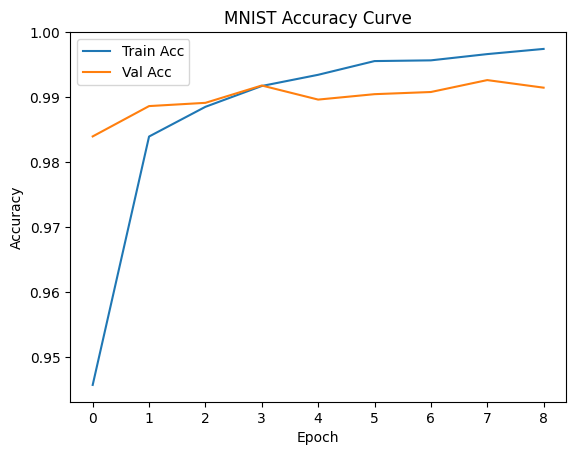

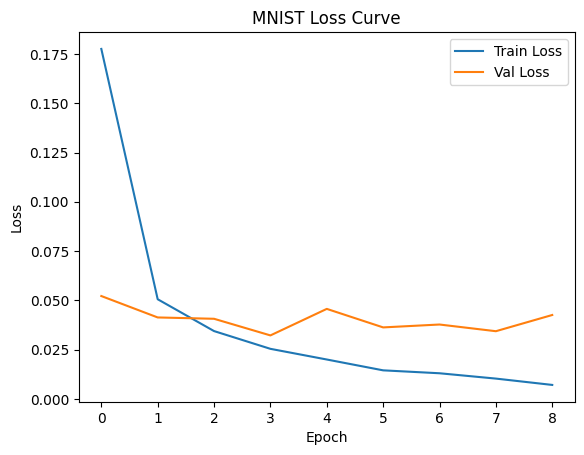

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# ======================
# Load Data
# ======================
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# ======================
# Build CNN
# ======================
inputs = Input((28,28,1))
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop]
)

# Evaluate
loss, acc = model.evaluate(x_test, y_test)
print("MNIST Accuracy:", acc)

# ======================
# Accuracy Curve
# ======================
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("MNIST Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ======================
# Loss Curve
# ======================
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MNIST Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9492 - loss: 0.1713 - val_accuracy: 0.9828 - val_loss: 0.0596
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9842 - loss: 0.0513 - val_accuracy: 0.9898 - val_loss: 0.0373
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9890 - loss: 0.0356 - val_accuracy: 0.9895 - val_loss: 0.0365
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9920 - loss: 0.0259 - val_accuracy: 0.9903 - val_loss: 0.0343
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9940 - loss: 0.0194 - val_accuracy: 0.9917 - val_loss: 0.0372
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accuracy: 0.9910 - val_loss: 0.0366
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9962 - loss: 0.0113 - val_accuracy: 0.9885 - val_loss: 0.0483
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9969 - loss: 0.0100 - 

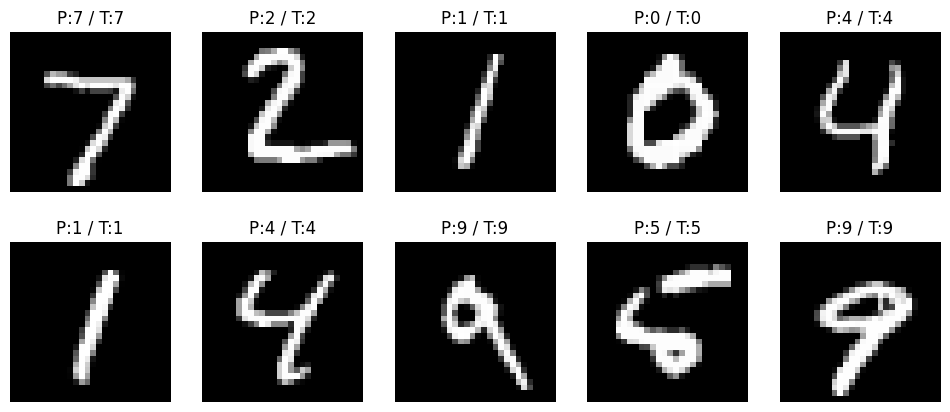

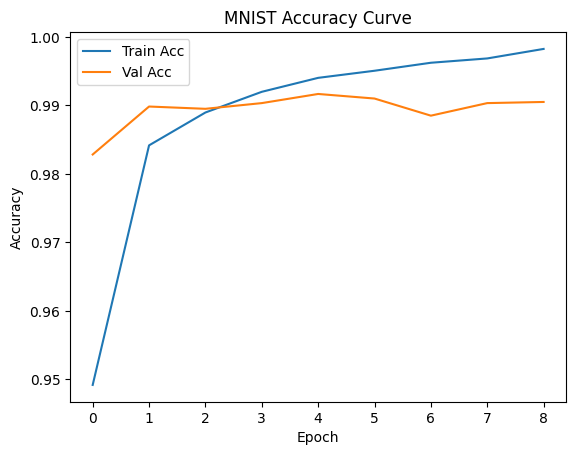

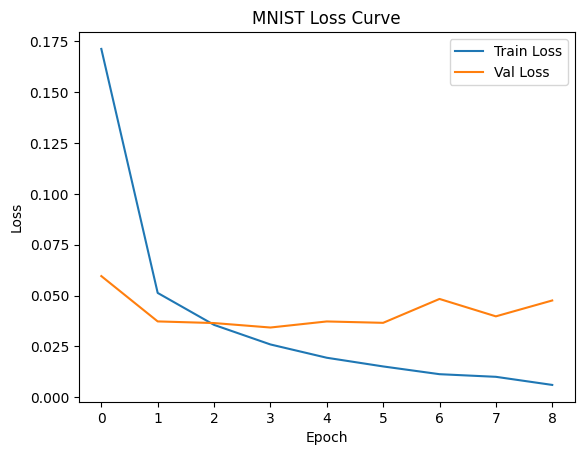

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# ======================
# Load Data
# ======================
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# ======================
# Build CNN
# ======================
inputs = Input((28,28,1))
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop]
)

# ======================
# Evaluate
# ======================
loss, acc = model.evaluate(x_test, y_test)
print("MNIST Test Accuracy:", acc)

# ======================
# Prediction
# ======================
pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)

# ======================
# Show Predictions
# ======================
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"P:{pred_classes[i]} / T:{y_test[i]}")
    plt.axis('off')
plt.show()

# ======================
# Accuracy Curve
# ======================
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("MNIST Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ======================
# Loss Curve
# ======================
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MNIST Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8201 - loss: 0.4999 - val_accuracy: 0.8723 - val_loss: 0.3503
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8804 - loss: 0.3279 - val_accuracy: 0.8903 - val_loss: 0.2958
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8958 - loss: 0.2811 - val_accuracy: 0.8980 - val_loss: 0.2811
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9064 - loss: 0.2520 - val_accuracy: 0.9025 - val_loss: 0.2650
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9164 - loss: 0.2280 - val_accuracy: 0.8963 - val_loss: 0.2780
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9238 - loss: 0.2049 - val_accuracy: 0.9083 - val_loss: 0.2530
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9315 - loss: 0.1870 - val_accuracy: 0.9098 - val_loss: 0.2474
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9379 - loss: 0.1670 - 

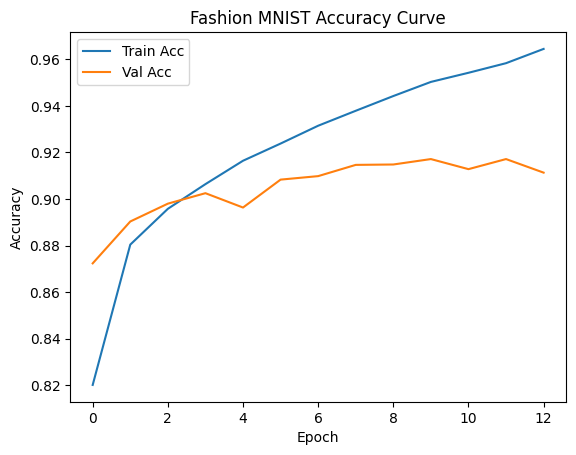

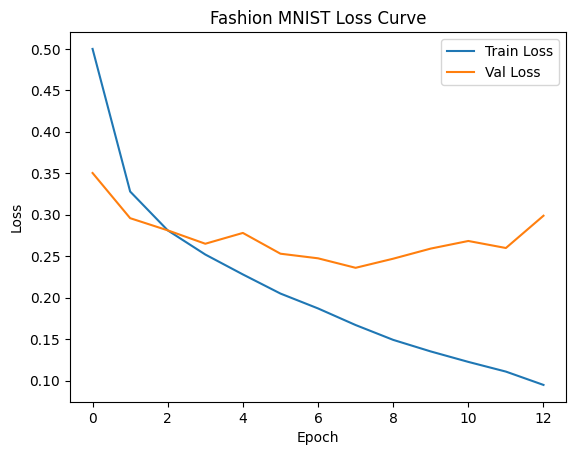

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


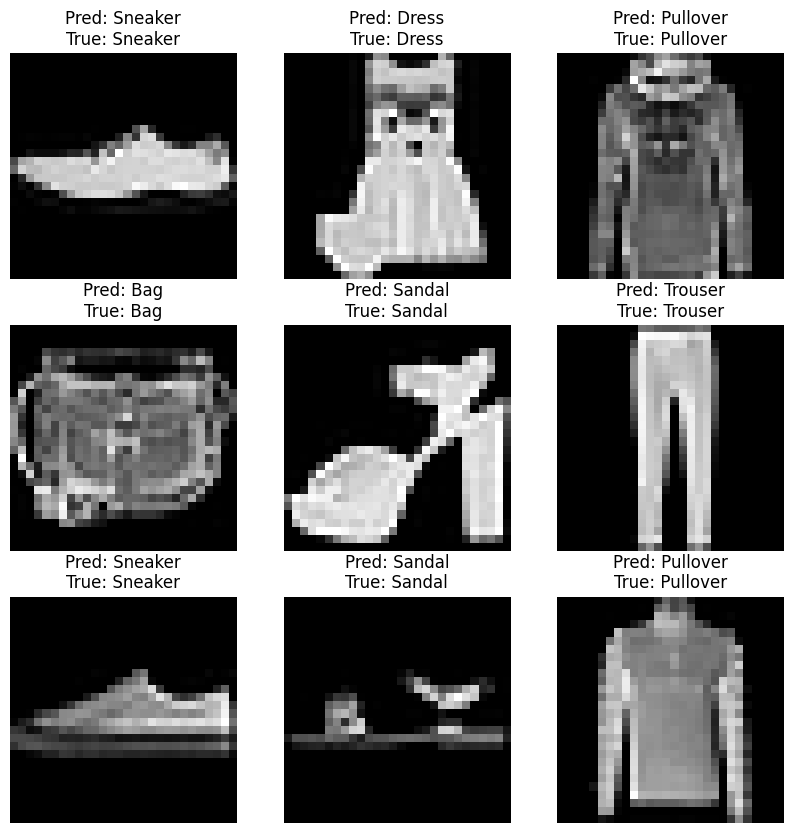

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# ======================
# Load Data
# ======================
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Class names
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

# ======================
# Build CNN
# ======================
inputs = Input((28,28,1))
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop]
)

# ======================
# Evaluate
# ======================
loss, acc = model.evaluate(x_test, y_test)
print("Fashion MNIST Accuracy:", acc)

# ======================
# Accuracy Curve
# ======================
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Fashion MNIST Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ======================
# Loss Curve
# ======================
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Fashion MNIST Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ======================
# Prediction Output
# ======================
predictions = model.predict(x_test)

plt.figure(figsize=(10,10))
for i in range(9):
    idx = np.random.randint(0, len(x_test))
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    pred_label = np.argmax(predictions[idx])
    true_label = y_test[idx]
    plt.title(f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}")
    plt.axis('off')

plt.show()
